In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#!/bin/bash
!curl -L -o /content/sample_data/salary-dataset-simple-linear-regression.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhishek14398/salary-dataset-simple-linear-regression

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   457  100   457    0     0    755      0 --:--:-- --:--:-- --:--:--   755


In [3]:
df = pd.read_csv('/content/sample_data/salary-dataset-simple-linear-regression.zip')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (18, 1)
X_test shape: (12, 1)
y_train shape: (18,)
y_test shape: (12,)


In [9]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

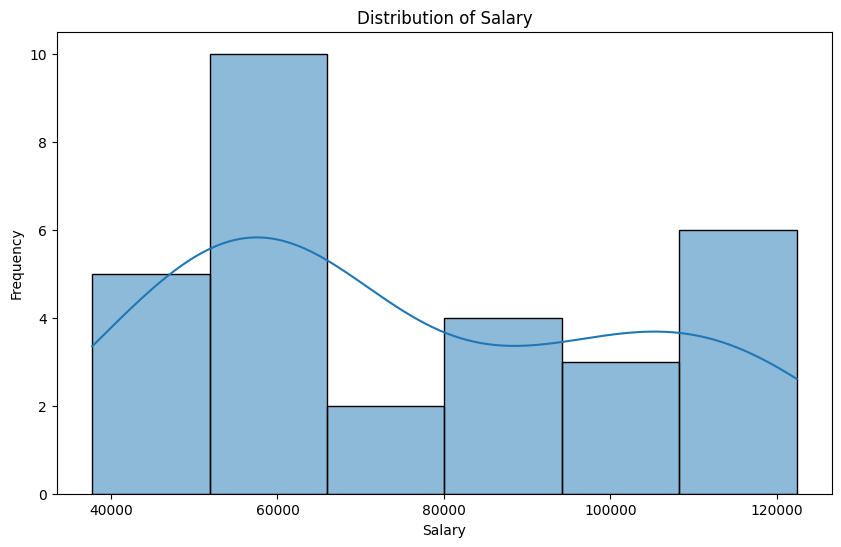

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Salary'], kde=True)

plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

In [11]:
y_train_transformed = np.log(y_train)

In [12]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train_normalized, y_train_transformed)

y_pred_log = linear_regression_model.predict(X_test_normalized)

y_pred_inverse = np.exp(y_pred_log)

In [13]:
mse = mean_squared_error(y_test, y_pred_inverse)

print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_inverse)

print(f"R-squared: {r2}")

Mean Squared Error: 55787092.15422057
R-squared: 0.931103042051366


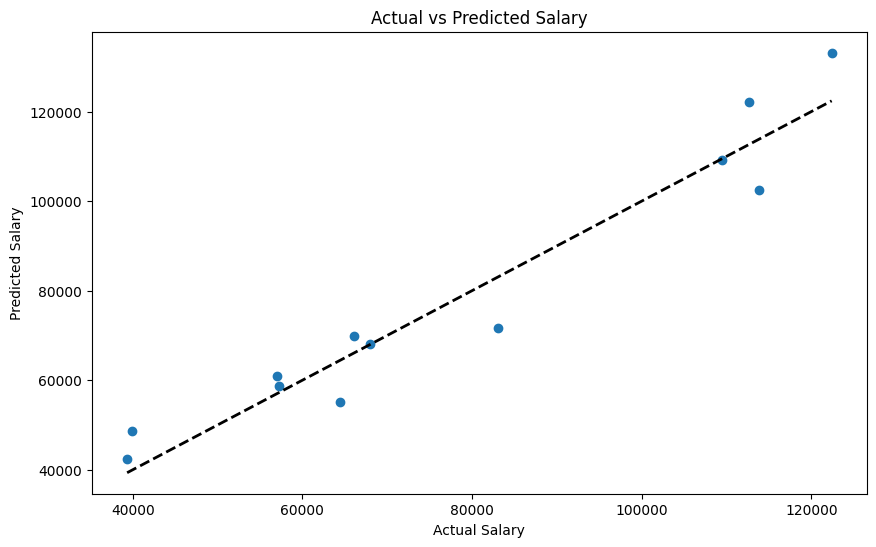

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_inverse)

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()